# Kabsch-Umeyama Algorithm

In this Notebook i will explain the steps i followed to implement this project. 

- To apply this algoritm, 4 different datasets were provided. I will start by showing the plane example since we have the results to compare with then i will apply it on the remaining data sets and provide the results. The results i will provide first are by using the svd function i implemented then i provide the results with the numpy svd to show that the implementation of the algorithm is right


## SVD Implementation with QR Method


- This iterative method calculated the QR decomposition of the matrix at each iteration where Ak = QR then calculates the next matrix as A(k+1) = RQ. The multiplication of Q's through all the iterations gives the eigen cevtors while the eigen values are in the Diagonal of the Ak matrix. 
- One of the ways to improve the convergence of this algorithm is to use the Shifts. At each iteration we subtract The last value of the diagonal to find the QR decomposition then add it again to find the next Ak.
- The implementaion of both the method and QR Factorization with Gram Schmidt  provided below:


In [ ]:
import numpy as np

def QR_Factorization(Matrix):
    """
    Function that calculates the Q R Factorization of a given matrix usingGram Schmidt Method
    Parameters: Matrix A
    Returns: Orthogonal Matrix Q and upper triangular matrix R
    """
    rows, columns = Matrix.shape
    
    #Initializing Q and R with the right sizes
    Q = np.zeros((rows, columns))
    R = np.zeros((columns, columns))

    # Gram-Schmidt process
    for i in range(columns):
        #Every iteration a column of the matrix is taken
        v = Matrix[:, i]
        
        #Find the Orthogonal vector
        for j in range(i):
            v -= np.dot(v, Q[:, j]) * Q[:, j]
        #Make it Orthonormal
        Q[:, i] = v / np.linalg.norm(v)

    # Calculation of R, R= QTA
    for i in range(columns):
        for j in range(i, columns):
            R[i, j] = np.dot(Q[:, i], Matrix[:, j])

    return Q, R

In [ ]:
def QR_Method(matrix, iterations=50000):
    
    #Copy the matrix to work on it
    matrixk = np.copy(matrix)
    
    #Create an identity matrix to start with for the eigen vectors matrix
    row_number = matrixk.shape[0]
    eigen_vectors_matrix = np.eye(row_number)
    
    #The number of iterations i predefined here but may be changed and given as a parameter
    for k in range(iterations):
        
        #Take last element of the diagonal
        last = matrixk.item(row_number-1, row_number-1)
        #create a diagonal matrix out of this element
        diagonal_Last = last * np.eye(row_number)
        
        #Subtract it and perdform QR decomposition (BOTH linalg.qr and m)
        Q, R = np.linalg.qr(np.subtract(matrixk, diagonal_Last))
        #Q, R = QR_Factorization(np.subtract(matrixk, diagonal_Last))
        
        
        # we add last element again and calculate The natrixk
        matrixk = np.add(R @ Q, diagonal_Last)
        
        #Calculating the eigen vectors
        eigen_vectors_matrix = eigen_vectors_matrix @ Q
        
    # Get eigenvalues as the diagonal of the matrix
    eigenvalues = np.diag(matrixk)
    
    # Sorting eigenvalues and corresponding eigenvectors (Convention)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigen_vectors_matrix[:, sorted_indices]
    
    return sorted_eigenvalues, sorted_eigenvectors

- Using this method the SVD decomposition can be calculated as follows:

In [ ]:
def SVD (Matrix):
    """
    Function to calculate the SVD decomposition of a given matrix
    Parameters: Matrix
    Returns: 3 Matrices such that Matrix = U S V.T 
    """
    #Calculate the transpose
    MatrixT = Matrix.T
    
    #Matrices we need to calculate eigenvectors
    ATA = np.dot(MatrixT, Matrix)
    
    #Gettin the eigen values and vectors by QR method
    eigen_values  , Vvectors = QR_Method(ATA)
    
    
    #Calculate singular values and put them into a diagonal matrix
    singular_values = np.sqrt(np.abs(eigen_values))
    # Sort eigenvalues based on their absolute values 
    singular_values_sorted = np.sort(singular_values)[::-1]
    Sigma = np.diag(np.sort(singular_values_sorted)[::-1])
    
    #Calculating Right left singular vectors U = A V Sigma.T
    Uvectors = Matrix @ Vvectors @ Sigma.T
    
    #Normalize U vectors
    column_magnitudes = np.linalg.norm(Uvectors, axis=0)
    Uvectors = Uvectors / column_magnitudes
    
    #Take the transpose of V
    Vvectors = Vvectors.T
    
    return Uvectors, Sigma, Vvectors

# Results:

##### The plane example :

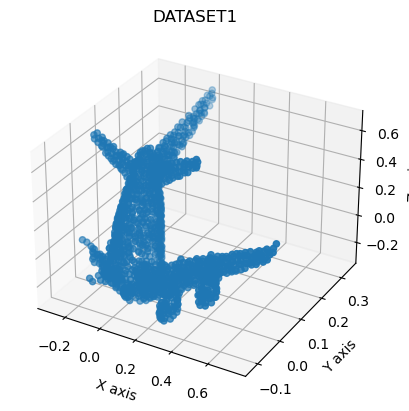

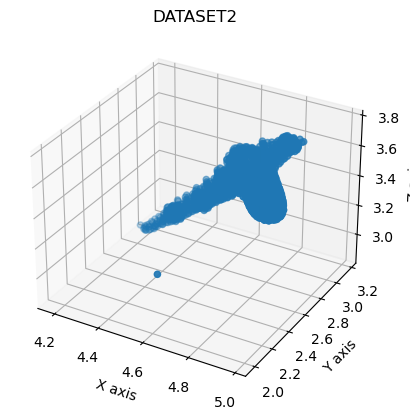

In [22]:
import matplotlib.pyplot as plt

def plot_3d_points(data, Title):
    """
    Function to plot a 3D data set in X, Y, Z axis
    #parameter: Matrix 
    """
    figure = plt.figure()
    ax = figure.add_subplot(projection='3d')

    # Extract x, y, z coordinates from the matrix
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]

    # Plot the points
    ax.scatter(xs, ys, zs)

    # Set labels for the axes
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    plt.title(Title)

    # Show the plot
    plt.show()
    
mat1_path = ".\plane_example\mat1.txt"
mat2_path = ".\plane_example\mat2.txt"


plot_3d_points(np.loadtxt(mat1_path), "DATASET1")
plot_3d_points(np.loadtxt(mat2_path), "DATASET2")

- After Arranging the dataset for the algorihtm i ended up by having two matrices Q and P each nxd where n = 594 and d=3 which represents the dimensions we are working in

- After centering the matrices i applied the Algorithm provided in the paper to calculate the rotation matrix. Calculating the translation vector was through the centroids of each data set.

- After calculation Rotation matrix and translation vector i applied their inverse to the second dataset we have and merged them to build the merged data.

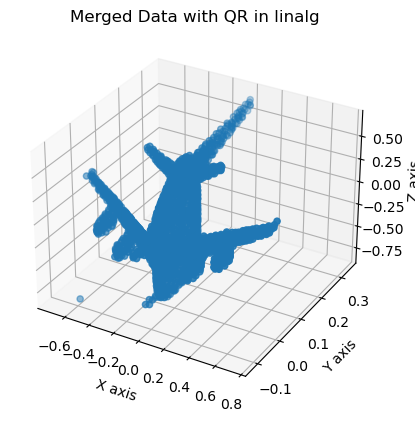

In [14]:
merged_path = ".\plane_results_withlinalg\merged.txt"

plot_3d_points(np.loadtxt(merged_path), "Merged Data with QR in linalg")

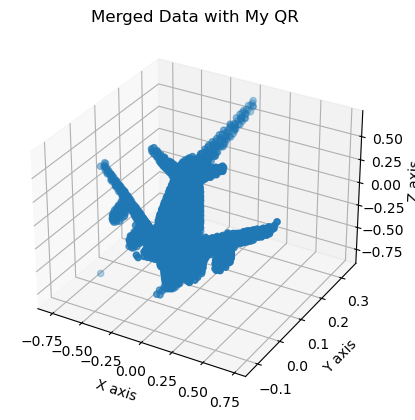

In [15]:
merged_path = ".\pln_with_my_qr\merged.txt"
plot_3d_points(np.loadtxt(merged_path), "Merged Data with My QR")

##### The cup:

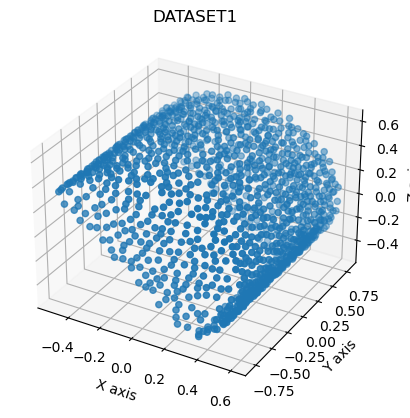

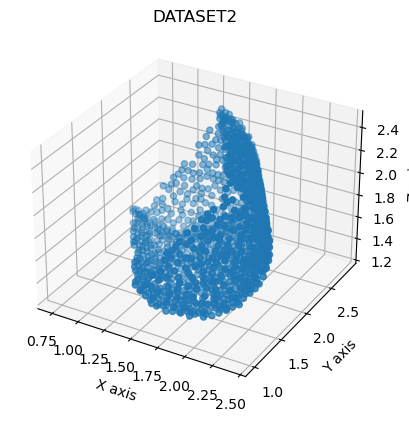

In [16]:
mat1_path = ".\cup\mat1.txt"
mat2_path = ".\cup\mat2.txt"


plot_3d_points(np.loadtxt(mat1_path), "DATASET1")
plot_3d_points(np.loadtxt(mat2_path), "DATASET2")

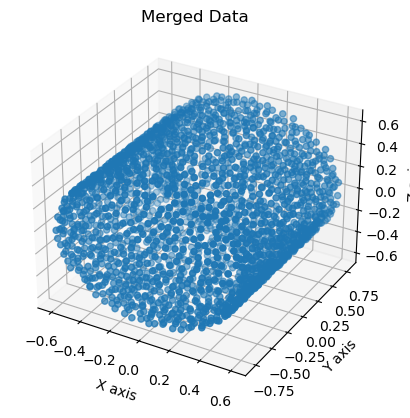

In [17]:
merged_path = "./cup_results/merged.txt"
plot_3d_points(np.loadtxt(merged_path), "Merged Data")

##### The Chair:

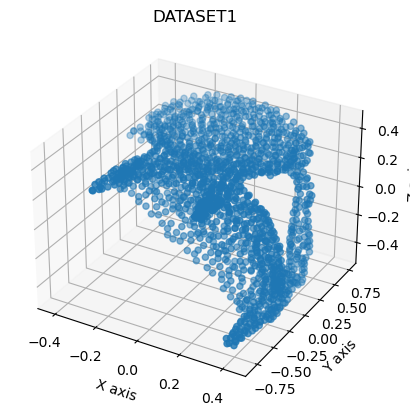

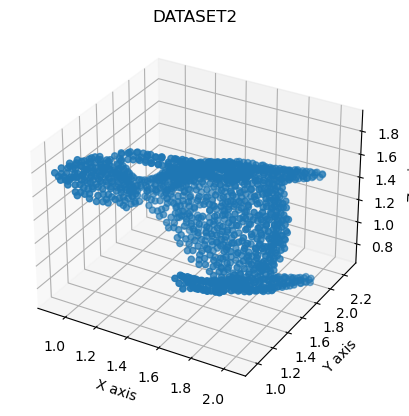

In [18]:
mat1_path = "./chair/mat1.txt"
mat2_path = "./chair/mat2.txt"


plot_3d_points(np.loadtxt(mat1_path), "DATASET1")
plot_3d_points(np.loadtxt(mat2_path), "DATASET2")

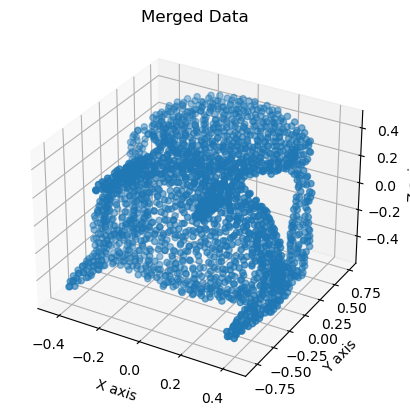

In [19]:
merged_path = "./chair_results/merged.txt"
plot_3d_points(np.loadtxt(merged_path), "Merged Data")

##### The Bottle:

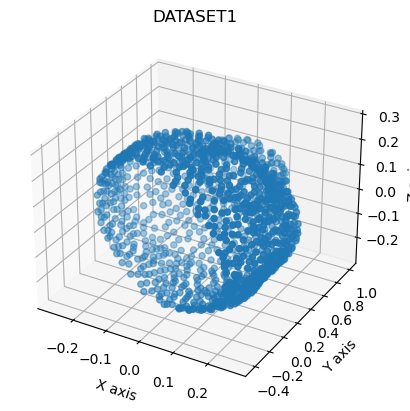

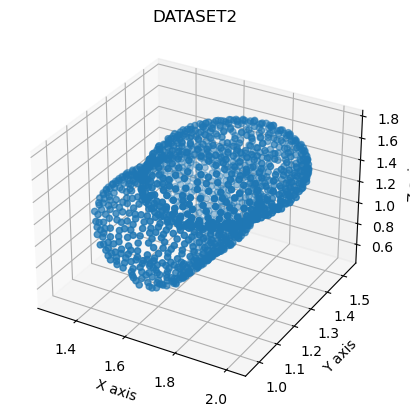

In [20]:
mat1_path = "./bottle//mat1.txt"
mat2_path = "./bottle/mat2.txt"


plot_3d_points(np.loadtxt(mat1_path), "DATASET1")
plot_3d_points(np.loadtxt(mat2_path), "DATASET2")

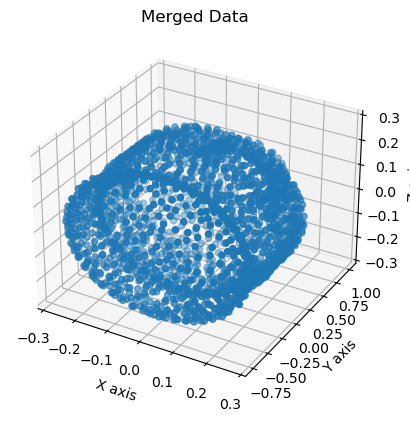

In [21]:
merged_path = "./bottle_results/merged.txt"
plot_3d_points(np.loadtxt(merged_path), "Merged Data")

### Calculating The errors:

In [28]:
My_results = np.loadtxt("./plane_results_withlinalg/rotation_mat.txt")#Path can be changed to calculate multiple Errors
My_results_translation = np.loadtxt("./plane_results_withlinalg/translation_vec.txt")#Path can be changed to calculate multiple Errors

Expected = np.loadtxt("./plane_example/rotation_mat.txt") 
Expected_vector = np.loadtxt("./plane_example/translation_vec.txt") 

####### Rotation Matrix #######
absolute_error = np.abs(My_results - Expected)

# Relative Error
relative_error = np.abs(My_results - Expected) / np.abs(My_results)

print("Absolute Error of Rotation Matrix:")
print(absolute_error)

print("\nRelative Error of Rotation Matrix:")
print(relative_error)

avg_absolute_error = np.mean(absolute_error)

# Average Relative Error
avg_relative_error = np.mean(relative_error)

print("Average Absolute Error of Rotation Matrix:", avg_absolute_error)
print("Average Relative Error of Rotation Matrix:", avg_relative_error)

print("#" * 50)

############## Translation Vector ####################

absolute_error = np.abs(My_results_translation - Expected_vector)

# Relative Error
relative_error = np.abs(My_results_translation - Expected_vector) / np.abs(My_results_translation)

print("Absolute Error Translation Vector:")
print(absolute_error)

print("\nRelative Error of Translation Vector:")
print(relative_error)

avg_absolute_error = np.mean(absolute_error)

# Average Relative Error
avg_relative_error = np.mean(relative_error)

print("Average Absolute Error of Translation Vector:", avg_absolute_error)
print("Average Relative Error of Translation Vector:", avg_relative_error)

Absolute Error of Rotation Matrix:
[[1.24454374e-05 3.86059631e-06 9.74945056e-06]
 [1.19393144e-05 4.58098489e-06 6.39413385e-06]
 [3.10215750e-06 5.75969855e-06 1.03468227e-05]]

Relative Error of Rotation Matrix:
[[2.23828294e-05 5.41621731e-06 2.28046822e-05]
 [3.07164308e-05 1.97745778e-05 7.17017751e-06]
 [4.22247377e-06 8.70017694e-06 6.97947518e-05]]
Average Absolute Error of Rotation Matrix: 7.5753995784201405e-06
Average Relative Error of Rotation Matrix: 2.122025749919497e-05
##################################################
Absolute Error Translation Vector:
[[2.77155034e-06 1.79802410e-06 2.58128790e-06]]

Relative Error of Translation Vector:
[[5.92915203e-07 6.08747209e-07 7.48855339e-07]]
Average Absolute Error of Translation Vector: 2.3836207780902896e-06
Average Relative Error of Translation Vector: 6.501725834658806e-07
